# Contents


#### 01. Importing Libraries and Data
#### 02. Addressing PII Data Privacy
#### 03. Creating Regional Segmentation of Data
#### 04. Excluding Low Activity Customers 


 ## Importing libraries and data

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
df_final = pd.read_pickle(r'C:\Users\David\Desktop\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged.pkl')

In [3]:
# Defining path 
path = r'C:\Users\David\Desktop\Instacart Basket Analysis'

In [4]:
# Check data
df_final.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Unnamed: 0,First Name,Surname,Gender,STATE,Age,date_joined,dependents,fam_status,income
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_final.shape

(32404859, 36)

## Addressing PII Data Privacy 

Particularly sensitive are names, email addresses, physical addresses, and phone numbers. Our dataset contains first and last names of customers. 

In [6]:
#Drop "First Name" and "Surname" from dataset
df_final = df_final.drop(['First Name', 'Surname'], axis=1)

In [7]:
# Checking the results
df_final.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_order_frequency,order_frequency_flag,Unnamed: 0,Gender,STATE,Age,date_joined,dependents,fam_status,income
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423


## 03. Creating a regional segmentation of the data

In [8]:
# Defining Regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating region column base on state column.
df_final.loc[df_final['STATE'].isin (Northeast), 'region'] = 'Northeast'
df_final.loc[df_final['STATE'].isin (Midwest), 'region'] = 'Midwest'
df_final.loc[df_final['STATE'].isin (South), 'region'] = 'South'
df_final.loc[df_final['STATE'].isin (West), 'region'] = 'West'

In [10]:
# Check columns 
df_final[['user_id', 'region', 'STATE']].head(20)

,user_id,region,STATE
0,1,South,Alabama
1,1,South,Alabama
2,1,South,Alabama
3,1,South,Alabama
4,1,South,Alabama
5,1,South,Alabama
6,1,South,Alabama
7,1,South,Alabama
8,1,South,Alabama
9,1,South,Alabama


In [11]:
# Checking the shape of the dataframe
df_final.shape

(32404859, 35)

In [12]:
df_final['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Checking customer spending habits by region 
spending_habits = pd.crosstab(df_final['region'], df_final['spender_flag'], dropna = False)

Text(0.5, 1.0, 'Regional Spending Habits')

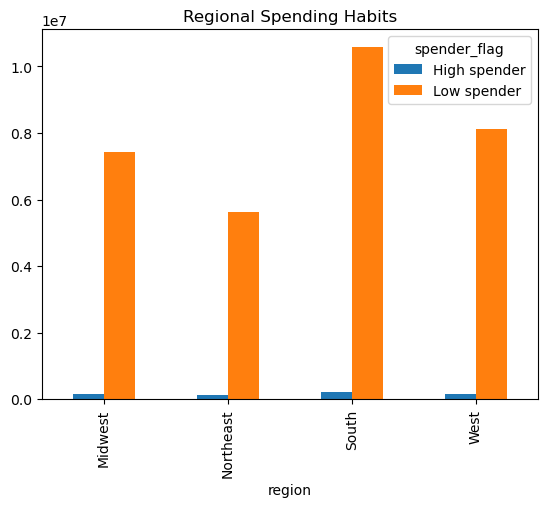

In [14]:
bar_regions = spending_habits.plot.bar()
plt.title('Regional Spending Habits')

The soouth has the highest number of high spenders and the highest number of high spenders. 

In [15]:
# Exporting bar Chart.
bar_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'Spending_habits.png'))

## 04.  Excluding low-activity customers

In [16]:
# If 'max_order' is 5 or higher, value in "customer_activity" will be 'High active'
df_final.loc[df_final['max_order'] >= 5, 'customer_activity'] = 'High active'

In [17]:
# If 'max_order' is less than 5, value in "customer_activity" will be 'Low active'

df_final.loc[df_final['max_order'] < 5, 'customer_activity'] = 'Low active'

In [18]:
# Check "customer_activity" column

df_final['customer_activity'].value_counts(dropna=False)

High active    30964564
Low active      1440295
Name: customer_activity, dtype: int64

In [19]:
# Create subset for "low-activity" customers
low_activity =  df_final[df_final['customer_activity'] == 'Low active']

In [20]:
# input a comment
low_activity.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Unnamed: 0,Gender,STATE,Age,date_joined,dependents,fam_status,income,region,customer_activity
1510,520620,120,prior,1,3,11,7.0,196,2,0,...,10436,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1511,3273029,120,prior,3,2,8,19.0,196,2,1,...,10436,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1512,520620,120,prior,1,3,11,7.0,46149,1,0,...,10436,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1513,3273029,120,prior,3,2,8,19.0,46149,1,1,...,10436,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active
1514,520620,120,prior,1,3,11,7.0,26348,3,0,...,10436,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low active


In [21]:
# Export "low-activity" subset
low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [22]:
#Create a subset for active customers
high_active_customers = df_final[df_final['customer_activity'] == 'High active']

In [23]:
# Check shape
high_active_customers.shape

(30964564, 36)

In [24]:
high_active_customers.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Unnamed: 0,Gender,STATE,Age,date_joined,dependents,fam_status,income,region,customer_activity
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,134862,Female,Alabama,31,2/17/2019,3,married,40423,South,High active
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,134862,Female,Alabama,31,2/17/2019,3,married,40423,South,High active
2,473747,1,prior,3,3,12,21.0,196,1,1,...,134862,Female,Alabama,31,2/17/2019,3,married,40423,South,High active
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,134862,Female,Alabama,31,2/17/2019,3,married,40423,South,High active
4,431534,1,prior,5,4,15,28.0,196,1,1,...,134862,Female,Alabama,31,2/17/2019,3,married,40423,South,High active


In [25]:
# Export high_active_customers
high_active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))